<a href="https://colab.research.google.com/github/Tanishq11098/VOIS_AICTE_Oct2025_TanishqSinghal/blob/main/AirBNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Replace 'your_file_name.xlsx' with the actual name of your file
file_path = '/content/Airbnb_Data_.xlsx'

try:
    df = pd.read_excel(file_path)
    print(f"Successfully loaded {file_path}")
    display(df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred while reading the file: {e}")

Successfully loaded /content/Airbnb_Data_.xlsx


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [26]:
# Ensure 'df' DataFrame exists from previous steps
# If not, you would need to load your data here, e.g.:
# df = pd.read_excel("Airbnb_Data (1).xlsx")

# Display the first row of the DataFrame
if 'df' in locals():
  display(df.iloc[0])
else:
  print("DataFrame 'df' not found. Please load the data first.")

,0
id,1001254
NAME,Clean & quiet apt home by the park
host id,80014485718
host_identity_verified,unconfirmed
host name,Madaline
neighbourhood group,Brooklyn
neighbourhood,Kensington
lat,40.64749
long,-73.97237
country,United States


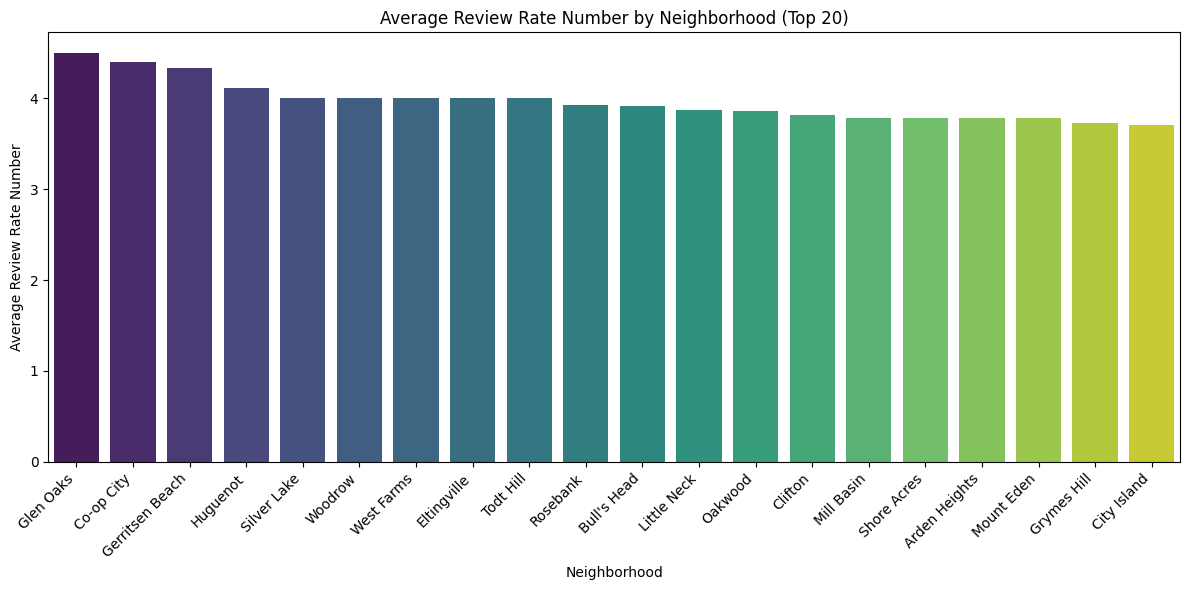

Generated a bar chart showing the average review rate number for the top 20 neighborhoods.


In [27]:
# Calculate the average review rate number by neighborhood
average_review_rate = df.groupby('neighbourhood')['review rate number'].mean().reset_index()

# Sort the neighborhoods by average review rate for better visualization
average_review_rate = average_review_rate.sort_values('review rate number', ascending=False)

# Select the top N neighborhoods to avoid overcrowding the chart (optional)
top_n = 20  # You can adjust this number
average_review_rate_top = average_review_rate.head(top_n)


# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=average_review_rate_top, x='neighbourhood', y='review rate number', hue='neighbourhood', palette='viridis', legend=False)
plt.title(f'Average Review Rate Number by Neighborhood (Top {top_n})')
plt.xlabel('Neighborhood')
plt.ylabel('Average Review Rate Number')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

print(f"Generated a bar chart showing the average review rate number for the top {top_n} neighborhoods.")

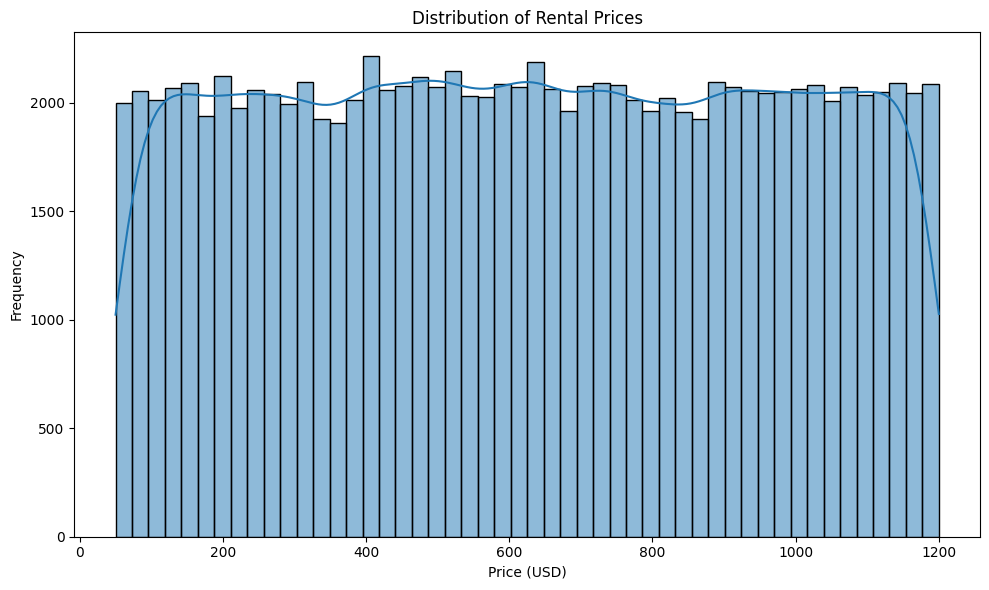

Generated a histogram showing the distribution of rental prices.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'df' DataFrame exists from previous steps
# If not, you would need to load your data here, e.g.:
# df = pd.read_excel("Airbnb_Data (1).xlsx")

# Clean price column (remove currency symbols/spaces) and coerce to numeric
# Use the 'price' column from the original df DataFrame
df['price_clean'] = pd.to_numeric(
    df['price'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False).str.strip(),
    errors='coerce'
)

# Drop rows where price_clean is NaN after coercion
price_data = df.dropna(subset=['price_clean'])

# Create a histogram of the cleaned price data
plt.figure(figsize=(10, 6))
sns.histplot(data=price_data, x='price_clean', bins=50, kde=True)
plt.title('Distribution of Rental Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Generated a histogram showing the distribution of rental prices.")

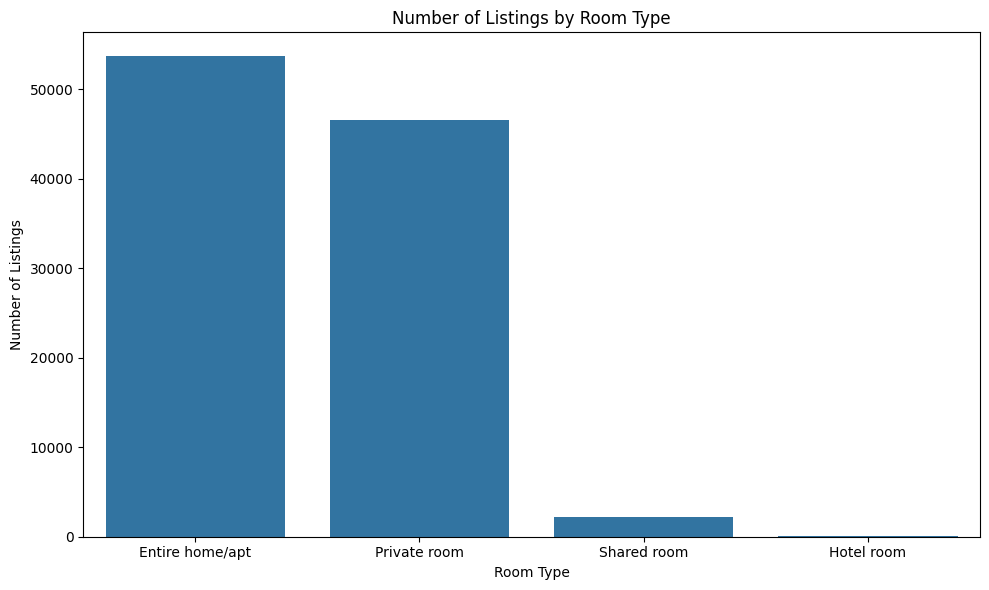

Generated a bar chart showing the number of listings by room type.


In [29]:
# Count the number of listings by room type
room_type_counts = df['room type'].value_counts().reset_index()
room_type_counts.columns = ['room type', 'count']

# Create a bar chart of room type counts
plt.figure(figsize=(10, 6))
sns.barplot(data=room_type_counts, x='room type', y='count')
plt.title('Number of Listings by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

print("Generated a bar chart showing the number of listings by room type.")